In [2]:
## import library and associated methods
from sqlalchemy import create_engine
from sqlalchemy import MetaData
from sqlalchemy import Table, Column
from sqlalchemy import Integer, String
from sqlalchemy import sql, select, join, desc
import pandas as pd
import seaborn as sns

Connect to database (stored on hipergator) and create tables to be used later

In [10]:
# Create a handle into the database called Engine.
engine = create_engine('sqlite:////blue/bsc4452/share/Class_Files/data/world.sqlite')

# Connect to the database
conn = engine.connect()

# Read the metadata
DBInfo=MetaData(engine)

# create an object called "country" based on a table from the database
country=Table('country', DBInfo, autoload=True)
# create an object called "city" based on another table from the database
city=Table('city', DBInfo, autoload=True)
# create an object called "countrylang" based on another table from the database
countrylang=Table('countrylanguage', DBInfo, autoload=True)


Query the database for countries with the following languages: Portugese, English, French, German, Dutch, Arabic, Spanish. Join these results to the country table. The end result is a list of countries that speak the desired lanugagues and the continents associated with the country.

In [14]:
query= select([country.c.Name, countrylang.c.Language, country.c.Continent])\
      .select_from(country.join(countrylang))\
      .where((countrylang.c.Language == 'Portuguese') |
            (countrylang.c.Language == 'English') |
             (countrylang.c.Language == 'French') |
            (countrylang.c.Language == 'German') |
             (countrylang.c.Language == 'Dutch') |
             (countrylang.c.Language == 'Arabic') |
             (countrylang.c.Language == 'Spanish'))

result = conn.execute(query)


Turn the result into a heatmap by continent.  This figure shows the percentage of X-language speaking countries in each continent.  So for example, 30.3% of all Arabic speaking countries are in Africa.

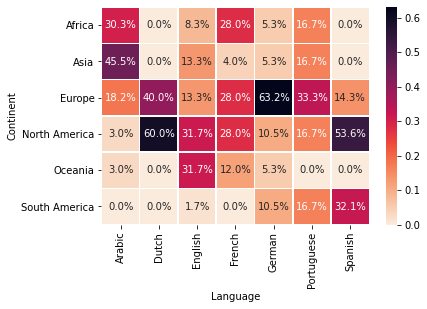

In [15]:
df = pd.DataFrame(result.fetchall()).reset_index()
df.columns = ['Index', 'Country','Language','Continent']

df_freq = pd.crosstab(df['Continent'],df["Language"],normalize='columns')

sns.heatmap(df_freq, cmap='rocket_r', annot=True, fmt='.1%',linewidths=.5);